In [1]:
from typing import Callable, Sequence
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
%matplotlib inline

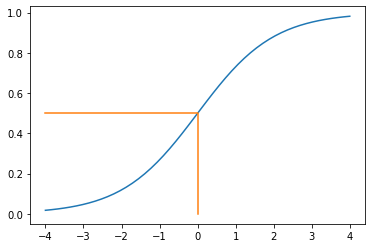

In [2]:
x = np.linspace(-4, 4)
y = expit(x)
plt.plot(x, y)
plt.plot((-4, 0, 0), (0.5, 0.5, 0))

In [3]:
from regression import BaseRegression

In [4]:
class LogisticRegression(BaseRegression):
    
    def get_hypothesis(self, theta: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
        def h(x: np.ndarray) -> np.ndarray:
            return expit(theta.T @ x.T)
        return h

    def cost_function(self, theta: np.ndarray) -> np.ndarray:
        h = self.get_hypothesis(theta)
        h_x = h(self.features)
        # NOTE:  Including ' / self.m' below appears to be more correct, but makes the regression less accurate?
        return (-(self.outputs * np.log(h_x).T) - ((1 - self.outputs) * np.log(1 - h_x).T)).sum() / self.m
    
    def delta(self, theta: np.ndarray) -> np.ndarray:
        return (self.features.T @ (expit(self.features @ theta) - self.outputs)) / self.m
    

In [5]:
x = np.random.rand(100, 1) * 10
y = np.empty((100, 1))
for i, _x in enumerate(x):
    if _x < 4:
        y[i] = 1
    else:
        y[i] = 0
test = LogisticRegression(x, y, scale_features=True)
#theta, h, num_steps = test.gradient_descent(a=0.05, iterations=500)
theta, h, num_steps = test.gradient_descent(a=0.1, convergence_threshold=0.000001)

In [6]:
num_steps

52995

In [7]:
for _x, _y in zip(test.features, y):
    plt.plot(_x[1], _y, 'bo')
test_range = np.linspace(0, 10, 50)
plt.plot(list(test_range), [test.get_prediction(i) for i in test_range])

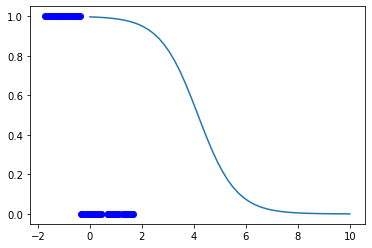

In [8]:
#for i in np.linspace(0, 10, 100):
#    plt.plot(i, h(np.array([1, i])), 'ro')


In [9]:
class OneVsAll:
    
    def __init__(self, features: Sequence[Sequence[float]], outputs: Sequence[int]):
        self.features = features
        self.outputs = outputs
        self.output_classes = np.unique(outputs)
        print('output classes: {}.'.format(self.output_classes))
        self.models = {}
        for oc in self.output_classes:
            oc = int(oc)
            modified_outputs = outputs.copy()
            for i, y in enumerate(outputs):
                if y == oc:
                    modified_outputs[i] = 1
                else:
                    modified_outputs[i] = 0
            model = LogisticRegression(features, modified_outputs, scale_features = False)
            model.gradient_descent(0.1, convergence_threshold = 0.000001)
            self.models[oc] = model
    
    def get_prediction(self, features: Sequence[float], add_x0: bool = True) -> int:
        predictions = {oc: self.models[oc].get_prediction(features, add_x0=add_x0) for oc in self.output_classes}
        return max(predictions, key=lambda k: predictions[k])
        #return predictions
        
        

In [10]:
x1 = np.random.rand(100, 1) * 10
y1 = np.empty((100, 1))
for i, _x in enumerate(x1):
    if _x < 2:
        y1[i] = 0
    elif _x < 6:
        y1[i] = 1
    else:
        y1[i] = 2

In [11]:
test = OneVsAll(x1, y1)

output classes: [0. 1. 2.].


In [12]:
m = 50
ones = (1, 0) + np.random.randn(m, 2)
twos = (3, 3) + np.random.randn(m, 2)
threes = (1, 5) + np.random.randn(m, 2)


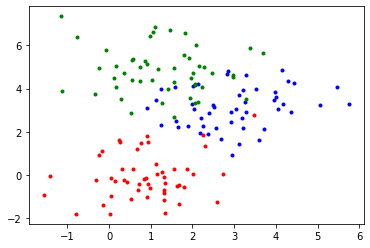

In [13]:
for x, y in ones:
    plt.plot(x, y, 'ro', markersize=3)
for x, y in twos:
    plt.plot(x, y, 'bo', markersize=3)
for x, y in threes:
    plt.plot(x, y, 'go', markersize=3)

features = np.vstack((ones, twos, threes))
outputs = np.vstack((
    np.full((m, 1), 1),
    np.full((m, 1), 2),
    np.full((m, 1), 3)
))

In [14]:
test2 = OneVsAll(features, outputs)

output classes: [1 2 3].


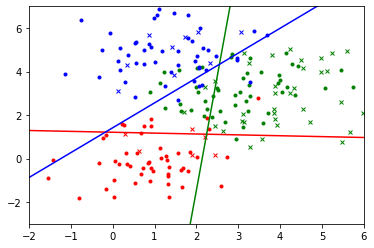

In [15]:
plt.xlim((-2, 6))
plt.ylim((-3, 7))

to_predict = np.random.rand(50, 2) * 6
colors = {1: 'r', 2: 'g', 3: 'b'}

for x, y in ones:
    plt.plot(x, y, colors[1]+'o', markersize=3)
for x, y in twos:
    plt.plot(x, y, colors[2]+'o', markersize=3)
for x, y in threes:
    plt.plot(x, y, colors[3]+'o', markersize=3)
    
for x, y in to_predict:
    prediction = test2.get_prediction((x, y))
    plt.plot(x, y, colors[prediction]+'x', markersize=4)
    
xs = np.linspace(-2, 6, 100)
for output in test2.models:
    model = test2.models[output]
    t0, t1, t2 = model.theta
    ys = (-t0 - (t1 * xs)) / t2
    plt.plot(xs, ys, colors[output])

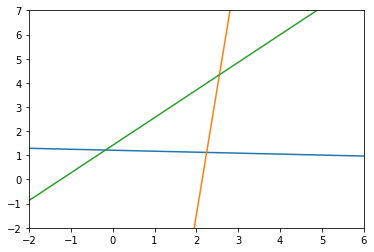

In [16]:
plt.xlim((-2, 6))
plt.ylim((-2, 7))
xs = np.linspace(-2, 6, 100)
for model in test2.models.values():
    t0, t1, t2 = model.theta
    ys = (-t0 - (t1 * xs)) / t2
    plt.plot(xs, ys)